In [2]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import pandas as pd

Question 1

Text(0.5, 1.0, 'Torsional Angle vs. Time at 500K (Simulation A)')

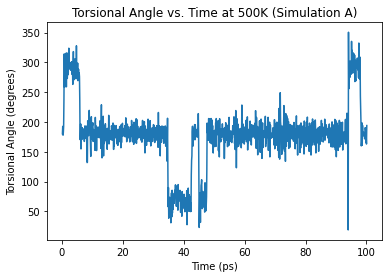

In [3]:
# Simulation A
torsionA = np.loadtxt("butane-torsion-A.txt") # length = 10000
timeA = np.linspace(0.1, 1000, 10000)

# Plot only first 1000 frames in Simulation A
plt.plot(timeA[1:1001], torsionA[1:1001])
plt.xlabel("Time (ps)")
plt.ylabel("Torsional Angle (degrees)")
plt.title("Torsional Angle vs. Time at 500K (Simulation A)")

Text(0.5, 1.0, 'Torsional Angle vs. Time at 500K (Simulation B)')

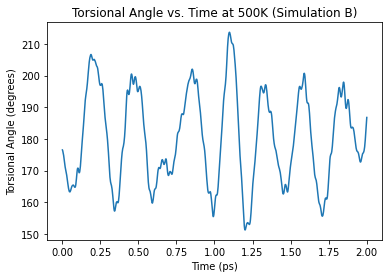

In [4]:
# Simulation B
torsionB = np.loadtxt("butane-torsion-B.txt") # length = 1000
timeB = np.linspace(0.002, 2, 1000)

# Plot Simulation A
plt.plot(timeB, torsionB)
plt.xlabel("Time (ps)")
plt.ylabel("Torsional Angle (degrees)")
plt.title("Torsional Angle vs. Time at 500K (Simulation B)")

Text(0.5, 1.0, 'Torsional Angle vs. Time at 500K (Simulation A)')

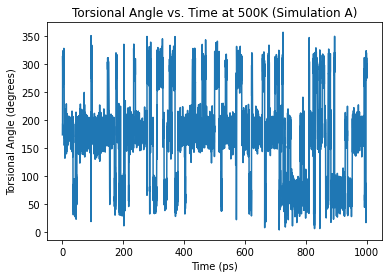

In [5]:
# Plot Simulation A
plt.plot(timeA, torsionA)
plt.xlabel("Time (ps)")
plt.ylabel("Torsional Angle (degrees)")
plt.title("Torsional Angle vs. Time at 500K (Simulation A)")

Text(0.5, 1.0, 'Torsional Angle vs. Time at 500K (Simulation A, first 100)')

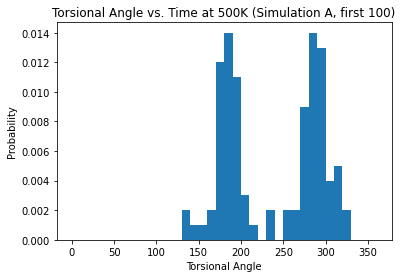

In [6]:
# Create histograms
xbins = np.linspace(0, 360, 37)
plt.hist(torsionA[1:101], bins = xbins, density = True)
plt.xlabel("Torsional Angle")
plt.ylabel("Probability")
plt.title("Torsional Angle vs. Time at 500K (Simulation A, first 100)")

Text(0.5, 1.0, 'Torsional Angle vs. Time at 500K (Simulation A, first 1000)')

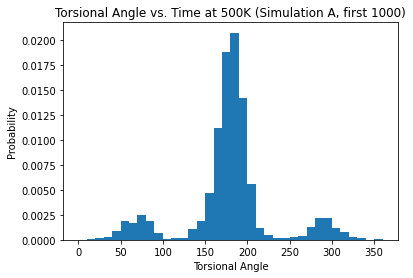

In [7]:
# Create histograms
plt.hist(torsionA[1:1001], bins = xbins, density = True)
plt.xlabel("Torsional Angle")
plt.ylabel("Probability")
plt.title("Torsional Angle vs. Time at 500K (Simulation A, first 1000)")

Text(0.5, 1.0, 'Torsional Angle vs. Time at 500K (Simulation A, complete)')

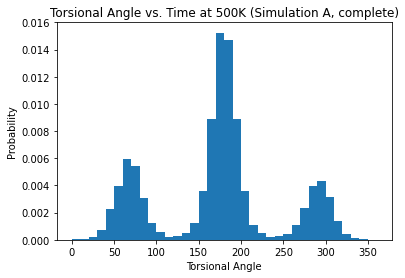

In [8]:
# Create histograms
plt.hist(torsionA, bins = xbins, density = True)
plt.xlabel("Torsional Angle")
plt.ylabel("Probability")
plt.title("Torsional Angle vs. Time at 500K (Simulation A, complete)")

Question 2

Text(0.5, 1.0, 'Potential Energy vs. Time (Energies1)')

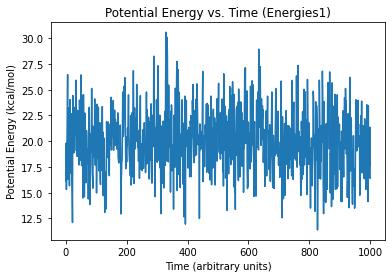

In [9]:
Energy1 = np.loadtxt("Energies1-1.txt") # first column is U, second column is K
time1 = np.linspace(0, 1000, 1001) # arbitrary time scale
plt.plot(time1, Energy1[:,0]) # potential energy
plt.xlabel("Time (arbitrary units)")
plt.ylabel("Potential Energy (kcal/mol)")
plt.title("Potential Energy vs. Time (Energies1)")

Text(0.5, 1.0, 'Kinetic Energy vs. Time (Energies1)')

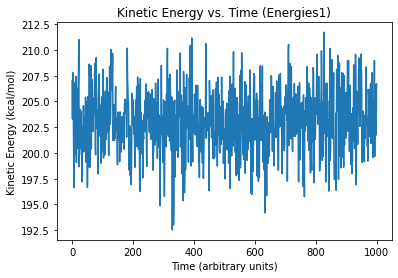

In [10]:
plt.plot(time1, Energy1[:,1]) # kinetic energy
plt.xlabel("Time (arbitrary units)")
plt.ylabel("Kinetic Energy (kcal/mol)")
plt.title("Kinetic Energy vs. Time (Energies1)")

Text(0.5, 1.0, 'Potential Energy vs. Time (Energies2)')

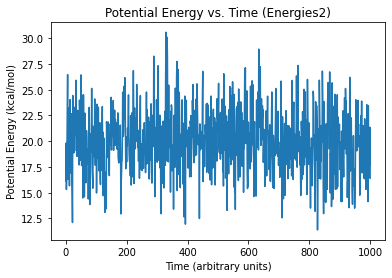

In [82]:
Energy2 = np.loadtxt("Energies2.txt") # first column is U, second column is K
time2 = np.linspace(0, 1000, 1001) # arbitrary time scale
plt.plot(time2, Energy2[:,0]) # potential energy
plt.xlabel("Time (arbitrary units)")
plt.ylabel("Potential Energy (kcal/mol)")
plt.title("Potential Energy vs. Time (Energies2)")

Text(0.5, 1.0, 'Kinetic Energy vs. Time (Energies2)')

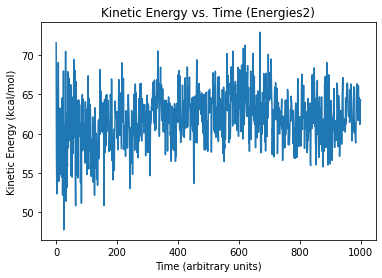

In [12]:
plt.plot(time2, Energy2[:,1]) # kinetic energy
plt.xlabel("Time (arbitrary units)")
plt.ylabel("Kinetic Energy (kcal/mol)")
plt.title("Kinetic Energy vs. Time (Energies2)")

The total energy in Energies1 for each timestep is [223.1103 223.1103 223.1103 ... 223.1103 223.1103 223.1103]
The standard deviation in Energies1 of the total energy is 6.042191067465145e-14
The total energy in Energies2 for each timestep is [87.65764  77.609066 67.670074 ... 78.959694 85.265238 80.678602]
The standard deviation in Energies2 of the total energy is 4.674766610008109
The average kinetic energy in Energies2 is  61.961667655344655
The standard deviation of the moving averages for Energies1 is  1.5338419710276259
The standard deviation of the moving averages for Energies2 is  2.0205238129497873


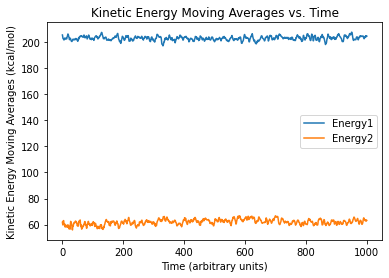

In [86]:
# Determine which simulation is constant energy or constant temperature
sumenergy1 = Energy1[:,0] + Energy1[:,1]
print("The total energy in Energies1 for each timestep is", sumenergy1) # Constant Energy
print("The standard deviation in Energies1 of the total energy is", np.std(sumenergy1))
# print("The standard deviation of the kinetic energy is", np.std(Energy1[:,1]))
sumenergy2 = Energy2[:,0] + Energy2[:,1]
print("The total energy in Energies2 for each timestep is", sumenergy2) # Constant Temperature
print("The standard deviation in Energies2 of the total energy is", np.std(sumenergy2))
print("The average kinetic energy in Energies2 is ", np.mean(Energy2[:,1]))
# print(np.std(Energy2[:,1]))

# Moving averages 
window_size = 5 # set window size
i = 0 # initialize
moving_averages1 = [] # initialize
moving_averages2 = [] # initialize
while i < len(Energy1) - window_size + 1:
    this_window = Energy1[i:i + window_size,1] # KE
    window_average = sum(this_window) / window_size
    moving_averages1.append(window_average)
    this_window = Energy2[i:i + window_size,1] # KE
    window_average = sum(this_window) / window_size
    moving_averages2.append(window_average)
    i += 1
time1avg = np.linspace(0, 1000, i) # arbitrary time scale
time2avg = np.linspace(0, 1000, i)
plt.plot(time1avg, moving_averages1, label = "Energy1")
plt.plot(time2avg, moving_averages2, label = "Energy2")
plt.legend()
plt.xlabel("Time (arbitrary units)")
plt.ylabel("Kinetic Energy Moving Averages (kcal/mol)")
plt.title("Kinetic Energy Moving Averages vs. Time")
print("The standard deviation of the moving averages for Energies1 is ", np.std(moving_averages1))
print("The standard deviation of the moving averages for Energies2 is ", np.std(moving_averages2))


Question 3

Text(0, 0.5, 'Distance (Angstroms)')

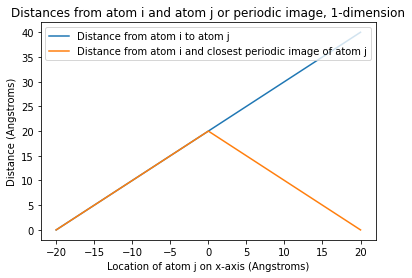

In [33]:
# 1-dimensional radial distances
# Set parameters
# Atom i
xi = np.linspace(-20, -20, 1001)

# Atom j (moving, for r(xj) and r_pbc)
xj = np.linspace(-20, 20, 1001)

# Atom j2 (lattice directly on left, for r_pbc)
xj2 = np.linspace(-60, -20, 1001)

# r(xj), distance between atom i and atom j
rxj = xj - xi

# r_pbc, minimum distance between atom i and lattice point
r_pbc = []
for i in range(len(xi)):
    dist1 = abs(xi[i] - xj[i])
    dist2 = abs(xi[i] - xj2[i])
    r_pbc.append(min(dist1, dist2))
plt.plot(xj, rxj, label = "Distance from atom i to atom j")
plt.plot(xj, r_pbc, label = "Distance from atom i and closest periodic image of atom j")
plt.legend()
plt.title("Distances from atom i and atom j or periodic image, 1-dimension")
plt.xlabel("Location of atom j on x-axis (Angstroms)")
plt.ylabel("Distance (Angstroms)")

Question 4

Text(0, 0.5, 'x (arbitrary units)')

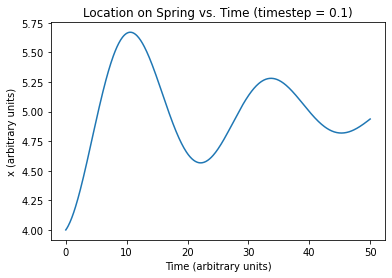

In [47]:
# Parameters
m = 2 # mass
k = 3 # spring constant
deltat = 0.1 # timestep
x0 = 5 # initial position
v0 = 0 # initial velocity
# Initial value for x
x = [4]
# Initial value for v
v = [0]

for i in range(500):
    x_update = x[i] + v[i] * deltat + 0.5*(-k*(x[i] - x0)/m)*(deltat**2)
    x.append(x_update)
    v_update = v[i] + 0.5*(-k*(x[i] - x0)/m + (-k*(x_update - x[i])/m))*(deltat**2)
    v.append(v_update)
timestep = np.linspace(0, 500*deltat, 501)

plt.plot(timestep, x)
plt.title("Location on Spring vs. Time (timestep = 0.1)")
plt.xlabel("Time (arbitrary units)")
plt.ylabel("x (arbitrary units)")

Text(0, 0.5, 'Energy (arbitrary units)')

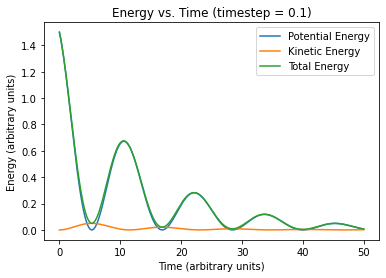

In [77]:
# Parameters
m = 2 # mass
k = 3 # spring constant
deltat = 0.1 # timestep
x0 = 5 # initial position
v0 = 0 # initial velocity
# Initial value for x
x = [4]
# Initial value for v
v = [0]
# Initial potential energy
U = [0.5*k*((x[0] - x0)*(x[0] - x0))]
# Initial kinetic energy
K = [0.5*m*(v[0]*v[0])]
# Initial total energy
E = [U[0] + K[0]]

for i in range(500):
    x_update = x[i] + v[i] * deltat + 0.5*(-k*(x[i] - x0)/m)*(deltat**2)
    x.append(x_update)
    v_update = v[i] + 0.5*(-k*(x[i] - x0)/m + (-k*(x_update - x[i])/m))*(deltat**2)
    v.append(v_update)
    U_update = 0.5*k*((x_update - x0)*(x_update - x0))
    U.append(U_update)
    K_update = 0.5*m*(v_update*v_update)
    K.append(K_update)
    E_update = U_update + K_update
    E.append(E_update)
timestep = np.linspace(0, 500*deltat, 501)

plt.plot(timestep, U, label = "Potential Energy")
plt.plot(timestep, K, label = "Kinetic Energy")
plt.plot(timestep, E, label = "Total Energy")
plt.legend()
plt.title("Energy vs. Time (timestep = 0.1)")
plt.xlabel("Time (arbitrary units)")
plt.ylabel("Energy (arbitrary units)")

Text(0, 0.5, 'x (arbitrary units)')

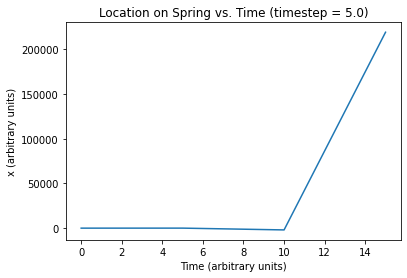

In [80]:
# Parameters
m = 2 # mass
k = 3 # spring constant
deltat = 5 # timestep
x0 = 5 # initial position
v0 = 0 # initial velocity
# Initial value for x
x = [4]
# Initial value for v
v = [0]
# Initial potential energy
U = [0.5*k*((x[0] - x0)*(x[0] - x0))]
# Initial kinetic energy
K = [0.5*m*(v[0]*v[0])]
# Initial total energy
E = [U[0] + K[0]]

for i in range(3):
    x_update = x[i] + v[i] * deltat + 0.5*(-k*(x[i] - x0)/m)*(deltat**2)
    x.append(x_update)
    v_update = v[i] + 0.5*(-k*(x[i] - x0)/m + (-k*(x_update - x[i])/m))*(deltat**2)
    v.append(v_update)
    U_update = 0.5*k*((x_update - x0)*(x_update - x0))
    U.append(U_update)
    K_update = 0.5*m*(v_update*v_update)
    K.append(K_update)
    E_update = U_update + K_update
    E.append(E_update)
timestep = np.linspace(0, 15, 4)

plt.plot(timestep, x)
plt.title("Location on Spring vs. Time (timestep = 5.0)")
plt.xlabel("Time (arbitrary units)")
plt.ylabel("x (arbitrary units)")

Text(0, 0.5, 'Energy (arbitrary units)')

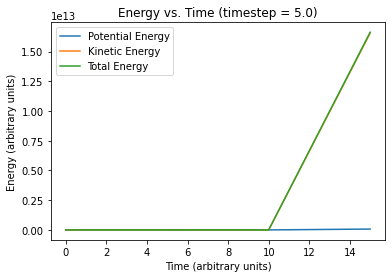

In [81]:
plt.plot(timestep, U, label = "Potential Energy")
plt.plot(timestep, K, label = "Kinetic Energy")
plt.plot(timestep, E, label = "Total Energy")
plt.legend()
plt.title("Energy vs. Time (timestep = 5.0)")
plt.xlabel("Time (arbitrary units)")
plt.ylabel("Energy (arbitrary units)")

Text(0, 0.5, 'x (arbitrary units)')

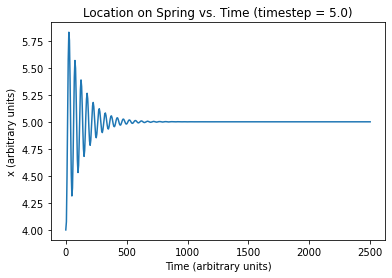

In [84]:
# Parameters
m = 500 # mass
k = 3 # spring constant
deltat = 5 # timestep
x0 = 5 # initial position
v0 = 0 # initial velocity
# Initial value for x
x = [4]
# Initial value for v
v = [0]
# Initial potential energy
U = [0.5*k*((x[0] - x0)*(x[0] - x0))]
# Initial kinetic energy
K = [0.5*m*(v[0]*v[0])]
# Initial total energy
E = [U[0] + K[0]]

for i in range(500):
    x_update = x[i] + v[i] * deltat + 0.5*(-k*(x[i] - x0)/m)*(deltat**2)
    x.append(x_update)
    v_update = v[i] + 0.5*(-k*(x[i] - x0)/m + (-k*(x_update - x[i])/m))*(deltat**2)
    v.append(v_update)
    U_update = 0.5*k*((x_update - x0)*(x_update - x0))
    U.append(U_update)
    K_update = 0.5*m*(v_update*v_update)
    K.append(K_update)
    E_update = U_update + K_update
    E.append(E_update)
timestep = np.linspace(0, 500*deltat, 501)

plt.plot(timestep, x)
plt.title("Location on Spring vs. Time (timestep = 5.0, mass = 500)")
plt.xlabel("Time (arbitrary units)")
plt.ylabel("x (arbitrary units)")

Text(0, 0.5, 'Energy (arbitrary units)')

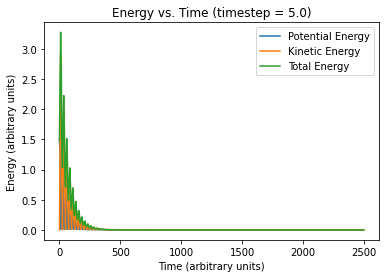

In [85]:
plt.plot(timestep, U, label = "Potential Energy")
plt.plot(timestep, K, label = "Kinetic Energy")
plt.plot(timestep, E, label = "Total Energy")
plt.legend()
plt.title("Energy vs. Time (timestep = 5.0, mass = 500)")
plt.xlabel("Time (arbitrary units)")
plt.ylabel("Energy (arbitrary units)")